<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-machine-learning/blob/main/RandomForestClassification_TitanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset download link:
https://drive.google.com/file/d/1Z8XgYu2g8JHP4o7ChlURvEhlbyHqDTa3/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

## Titanic Dataset
* PassengerId: شماره مسافر
* Survived: آیا مسافر زنده مانده است یا نه (هدف)
* Pclass: کلاس مسافر
* Name: نام مسافر
* Sex: جنسیت
* Age: سن
* SibSp: تعداد برادران، خواهران یا همسران همراه مسافر
* Parch: تعداد والدین یا فرزندان همراه مسافر
* Ticket: شماره بلیط
* Fare: کرایه پرداخت شده
* Cabin: شماره کابین
* Embarked: بندر سوار شدن

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
path='/content/drive/MyDrive/datasets/titanic.csv'
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape
df.columns
df.dtypes
df.nunique()
df.info()
df.describe()

In [25]:
df=df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.isnull().sum()

In [26]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [28]:
def plot_column_distributions(df):
    n_cols = 3
    n_rows = (len(df.columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))

    for i, column in enumerate(df.columns):
        row, col = divmod(i, n_cols)
        ax = axes[row, col]

        if pd.api.types.is_numeric_dtype(df[column]):
            sns.histplot(x=df[column], ax=ax)
            print(f'Skewness of {column}: {skew(df[column])}')
        else:
            sns.countplot(x=df[column], ax=ax)

        ax.set_title(column)

    for i in range(len(df.columns), n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

Skewness of Survived: 0.4777174662568536
Skewness of Pclass: -0.6294858816096934
Skewness of Age: 0.5093852558219663
Skewness of SibSp: 3.6891276847759507
Skewness of Parch: 2.7444867379203735
Skewness of Fare: 4.7792532923723545
Skewness of Sex_male: -0.6178784065548295
Skewness of Embarked_Q: 2.9438109935971046
Skewness of Embarked_S: -1.0079641163364024


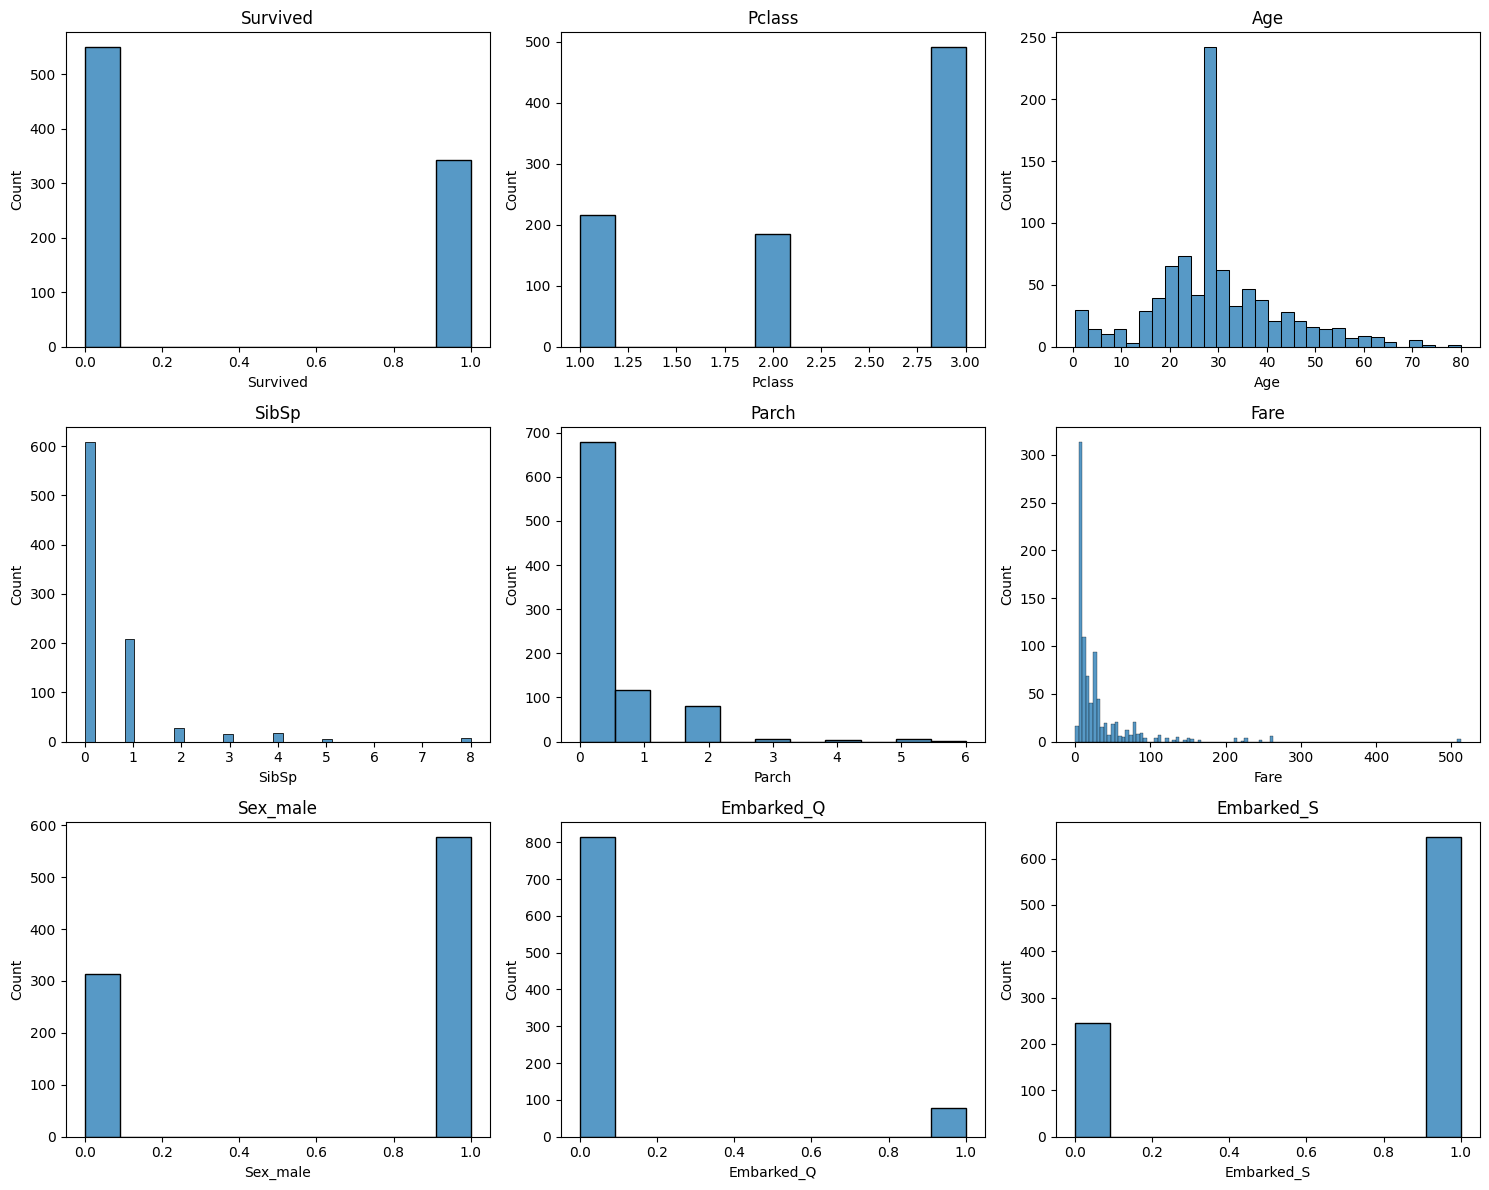

In [29]:
plot_column_distributions(df)

In [ ]:
from scipy.stats import skew
fare_skewness = skew(df['Fare'])
print(f'Skewness of Fare: {fare_skewness}')

plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True)
plt.title('Age Distribution before Transformation')
plt.show()

In [ ]:
df['Fare'] = np.log1p(df['Fare'])
fare_skewness_after = skew(df['Fare'])
print(f'Skewness of Fare after log transformation: {fare_skewness_after}')

# # تبدیل جذری
# df['Fare'] = np.sqrt(df['Fare'])
# fare_skewness_after = skew(df['Fare'])
# print(f'Skewness of Fare after log transformation: {fare_skewness_after}')


# # تبدیل معکوس
# df['Fare'] = 1 / (df['Fare'] + 1e-9)
# fare_skewness_after = skew(df['Fare'])
# print(f'Skewness of Fare after log transformation: {fare_skewness_after}')

# # تبدیل یئو جانسون
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer(method='yeo-johnson')
# df['Fare'] = pt.fit_transform(df[['Fare']])
# fare_skewness_after = skew(df['Fare'])
# print(f'Skewness of Fare after log transformation: {fare_skewness_after}')


# تبدیل باکس کاکس
# from scipy import stats
# df['Fare'], _ = stats.boxcox(df['Fare'] + 1e-9)
# fare_skewness_after = skew(df['Fare'])
# print(f'Skewness of Fare after log transformation: {fare_skewness_after}')

In [ ]:
fare_skewness_after = skew(df['Fare'])
print(f'Skewness of Fare after log transformation: {fare_skewness_after}')

plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution after Log Transformation')
plt.show()

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred,average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassification Report:\n{classification_report(y_test, y_pred )}")

In [ ]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)